# 编程实践部分


# 1、生成语言模型

In [1]:
任意段落 = """
war = 主语 谓语 动词 宾语
主语 = 特朗普 | 老美    
谓语 = 使用 代言人 明星活动* 攻击物  
攻击物 =苏打水 | 挖掘机 |纸尿裤
使用 =  购买|引进|研发
代言人 = 佟大为 | 詹姆斯 | 英国威廉王子 | 唐国强| 宾语 |
明星活动*= null|明星活动 明星活动* 
明星活动= 代言的|赞助的| 投资的
动词 = 制裁 | 轰炸 
宾语 = 鲁哈尼 | 苏莱曼尼 | 伊朗 | 代言人
"""
import random
Rchoice=random.choice
def create_grammar(grammar_str,split,line_split='\n'):#将一段话变为列表
    grammar={} 
    for line in grammar_str.split(line_split):#将段落按行进行划分
        if not line:continue  #如果不为空
        expression,formula=line.split(split)#将每一行划分成左右两部分字符串 
        grammar[expression.strip()]=[f.split() for f in formula.split('|')]#将formula字符串划分成生成列表,用expression：formulas组成列表grammar
    return grammar
#create_grammar(任意段落,'=')
def generate(gram, target):#循环取出元素组成新字符串
    if target not in gram: return target 
    expaned = [generate(gram, t) for t in Rchoice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])


In [2]:
#生成多条语句
def generate_n(n):
    for i in range(n):
        print(generate(create_grammar(任意段落, split='='),'war'))
generate_n(20)

特朗普研发唐国强苏打水制裁苏莱曼尼
老美购买佟大为挖掘机制裁伊朗
特朗普购买唐国强纸尿裤制裁伊朗
老美研发英国威廉王子代言的苏打水制裁鲁哈尼
老美引进挖掘机轰炸鲁哈尼
特朗普购买唐国强挖掘机轰炸苏莱曼尼
老美引进伊朗赞助的投资的代言的挖掘机制裁苏莱曼尼
特朗普引进唐国强赞助的苏打水制裁苏莱曼尼
老美购买佟大为代言的苏打水制裁鲁哈尼
特朗普引进詹姆斯赞助的投资的苏打水制裁鲁哈尼
老美研发唐国强苏打水制裁唐国强
老美引进詹姆斯代言的投资的挖掘机轰炸苏莱曼尼
特朗普引进纸尿裤制裁伊朗
老美购买唐国强纸尿裤轰炸苏莱曼尼
老美研发佟大为代言的代言的赞助的代言的挖掘机轰炸唐国强
老美引进詹姆斯代言的赞助的挖掘机轰炸
老美引进唐国强代言的投资的赞助的代言的苏打水制裁伊朗
特朗普引进唐国强赞助的代言的投资的投资的苏打水轰炸苏莱曼尼
特朗普引进佟大为代言的代言的纸尿裤制裁伊朗
老美研发唐国强挖掘机轰炸伊朗


# 2、分析辨别

In [3]:
#读取文件，并将文件内容转化为字符串

import pandas as pd#数据预处理和数据分析

filename=r"E:\NPL学习\第二章 人工智能引论与思维方法\Lecture-01-Syntax-Tree-and-Language-Model.ipynb课程在线准备代码\train.txt"
#打开文件时，还需要考虑encoding
fileread=pd.read_csv(filename,header=None,sep='\t') #sep='\n'按行划分，header=None首行不作为属性行
print(type(fileread))#<class 'pandas.core.frame.DataFrame'>
fileread.head()#不输入数字默认显示文件前五行
content=fileread[0].tolist()#将文件内容组成一个列表，一个索引一行
content_str=''.join(content)#将列表转化为字符串

<class 'pandas.core.frame.DataFrame'>


In [4]:
#去除非汉字字符

# content_str_new=u""
# for i in range(0,len(content_str)):
#     if(content_str[i]>=u'\u4e00' and content_str[i]<=u'\u9fa5'):
#           content_str_new = content_str_new+content_str[i] 
# print(content_str_new)

In [5]:
#字符清除并生成列表

import re#正则表达式
def token(string): #去除特殊字符包括空格，留下汉字、英文、数字、下划线组成列表     
    return re.findall('\w+',string)#\W+大写W结果正好与小写相反
#\s+返回空格组成的列表，\S+返回非空格组成列表
''.join(token(content[0]))#组成一串连续字符
content_clean = [''.join(token(str(c)))for c in content]
len(content_clean)

12889

In [6]:
#使用jieba库分词

import jieba#全模式、精确模式搜索
from collections import Counter#计数

with_jieba_cut = Counter(jieba.cut(content[0]))#对精确分词结果进行统计计数
print(with_jieba_cut)
with_jieba_cut.most_common()[:10]#返回计数最多的10个词

def cut(string): return list(jieba.cut(string))#精确模式分词函数

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.233 seconds.
Prefix dict has been built successfully.


Counter({' ': 16, '++': 6, '$': 3, '0': 1, 'disability': 1, '-': 1, 'insurance': 1, '法律': 1, '要求': 1, '残疾': 1, '保险': 1, '吗': 1, '？': 1, 'Is': 1, 'Disability': 1, 'Insurance': 1, 'Required': 1, 'By': 1, 'Law': 1, '?': 1})


In [7]:
#将清除特殊字符后的列表内容写进新文件中并分词

with open('train_new.txt', 'w') as f:
    for a in content_clean:
        f.write(a + '\n')#分行写入

TOKEN = []

for i, line in enumerate((open('train_new.txt'))):
    if i % 100 == 0: print(i)    
    if i > 10000: break    
    TOKEN += cut(line)#对新文件中的每一行进行分词
words_count = Counter(TOKEN)
frequiences=[f for w,f in words_count.most_common(100)]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [8]:
#连续执行同一功能

from functools import reduce#连续执行
from operator import add, mul#operator为运算符模块
reduce(add, [1, 2, 3, 4, 5, 8])#连续执行add功能

23

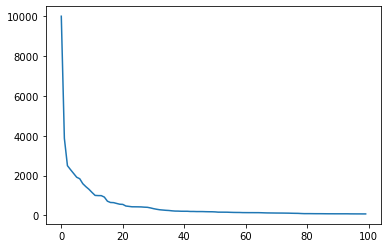

In [9]:
#绘图1

%matplotlib inline
#%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，
#或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

x=[i for i in range(100)]
import matplotlib.pyplot as plt
plt.plot(x,frequiences)



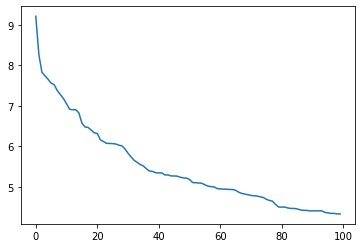

In [10]:
#绘图2

import numpy as np
plt.plot(x,np.log(frequiences))#不输入底数默认以e为底，log10(frequience)就是以10为底

In [11]:
#将词组两两组合生成新的列表

TOKEN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
#每两个连续的词组合成一个词
#i从[0,2]、[1,3]、[2,4]...取到[441508,441511]，每两个词一组
TOKEN_2_GRAM[:10]  #连续两个词组成的前十个小组合
words_count_2 = Counter(TOKEN_2_GRAM)

In [12]:
#求概率

def prob_1(word):#求一个词的概率
    return words_count[word] / len(TOKEN)

def prob_2(word1, word2):#返回两个词连续发生概率
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)
    
def get_probablity(sentence):#返回一个句子的概率
    words = cut(sentence)   #精确模式搜索 
    sentence_pro = 1    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]        
        probability = prob_2(word, next_)  #获取相邻两个词同时发生概率      
        sentence_pro *= probability    
    return sentence_pro

need_compared = [
    "我今年1月需要买车险 妈妈明年会买保险",
    "李婷婷会开车 李婷婷不会开卡车",
    "今晚我去参加朋友聚会 今晚我去找老同学",
    "不会开车违反法律 买车不符合法律要求"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

妈妈明年会买保险 is more possible
---- 我今年1月需要买车险 with probility 2.1286512263402824e-30
---- 妈妈明年会买保险 with probility 1.6547650495263087e-20
李婷婷会开车 is more possible
---- 李婷婷会开车 with probility 1.2863767136909423e-10
---- 李婷婷不会开卡车 with probility 1.458989796516851e-15
今晚我去找老同学 is more possible
---- 今晚我去参加朋友聚会 with probility 1.8768104997519636e-25
---- 今晚我去找老同学 with probility 1.6547650495263087e-20
不会开车违反法律 is more possible
---- 不会开车违反法律 with probility 1.458989796516851e-15
---- 买车不符合法律要求 with probility 1.9857180594315702e-19


In [13]:
#简单句子可能性比较
def generate_best(s): 
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    result12=sorted([(s1, p1), (s2, p2)], key=lambda x: x[1], reverse=True)
    print("“%s”这句话的可能性大于“%s”"%(result12[0][0],result12[1][0]))   
generate_best("我今年1月需要买车险 妈妈明年会买保险")

“妈妈明年会买保险”这句话的可能性大于“我今年1月需要买车险”
